<a href="https://colab.research.google.com/github/Rmejiaz/ModeladoSimulacion/blob/main/Cuadernos/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEIR modeling of the COVID-19 and its dynamics

### Proyecto final de la asignatura Modelado y Simulación

### Réplica del siguiente artículo: https://link.springer.com/article/10.1007/s11071-020-05743-y#Tab4


##### Rafael Mejía Zuluaga
##### rmejiaz@unal.edu.co

## Modelo Propuesto:

\begin{aligned} \left\{ \begin{array}{l} \dot{S} = - \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) + {\rho _1}Q - {\rho _2}S + \alpha R\\ \dot{ E} = \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) - {\theta _1}E - {\theta _2}E\\ {\dot{I}}_1 = {\theta _1}E - {\gamma _1}{I_1}\\ \dot{I}_2 = {\theta _2}E - {\gamma _2}{I_2} - \varphi {I_2} + \lambda \left( \varLambda + Q \right) \\ \dot{R} = {\gamma _1}{I_1} + {\gamma _2}{I_2} + \phi H - \alpha R\\ \dot{H} = \varphi {I_2} - \phi H\\ \dot{Q} = \varLambda + {\rho _2}S - \lambda \left( {\varLambda + Q} \right) - {\rho _1}Q \end{array} \right. , \end{aligned}

## Descripción de las variables del sistema:

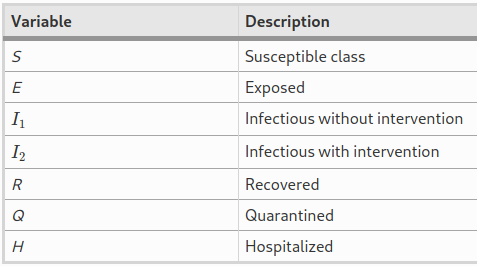

## Descripción de los parámetros del sistema:

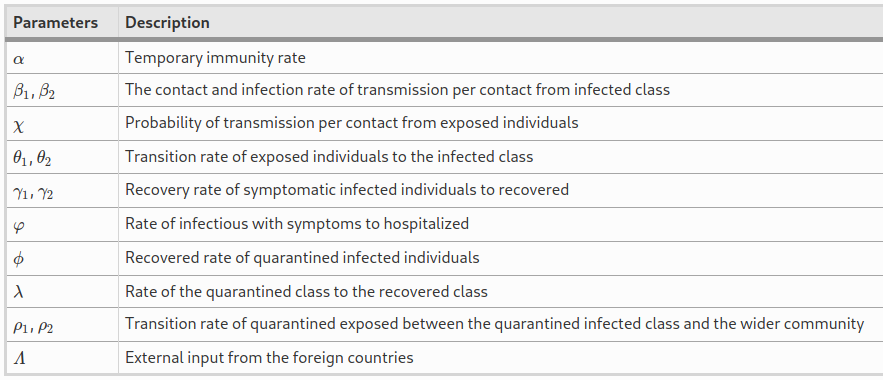



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
alpha = 1.2048e-4
beta_1 = 1.0538e-1
beta_2 = 1.0538e-1
X = 1.6221e-1
theta_1 = 9.5e-4 
theta_2 = 3.5412e-2
gamma_1 = 8.5e-3
gamma_2 = 1.0037e-3
phi = 0.2910
Phi = 0.0107
lambda_ = 9.4522e-2 
rho_1 = 2.8133e-3
rho_2 = 1.2668e-1
Lambda = 100

def SEIRModel(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda = parameters
  S,E,I1,I2,R,H,Q = y
  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - phi*I2 + lambda_ * (Lambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + Phi*H - alpha*R
  H_dot = phi*I2 - Phi*H
  Q_dot = Lambda + rho_2*S - lambda_ * (Lambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot

var_names = ['Susceptible','Exposed','Infectious without intervention','Infectious with intervention','Recoveded','Quarantined','Hospitalized']

In [ ]:
N=6.5563e4

parameters = [1.2048e-4, 1.0538e-1, 1.0538e-1, 1.6221e-1, 9.5e-4, 3.5412e-2, 8.5e-3, 1.0037e-3, 0.2910, 0.0107, 9.4522e-2, 2.8133e-3, 1.2668e-1, 100]

y0 = [94076,4007,262,524,31,100,1000] 
t_span = [0,100]
t = np.arange(0,100,1)
yt = solve_ivp(SEIRModel,t_span,y0,args=(N,parameters),t_eval=t)

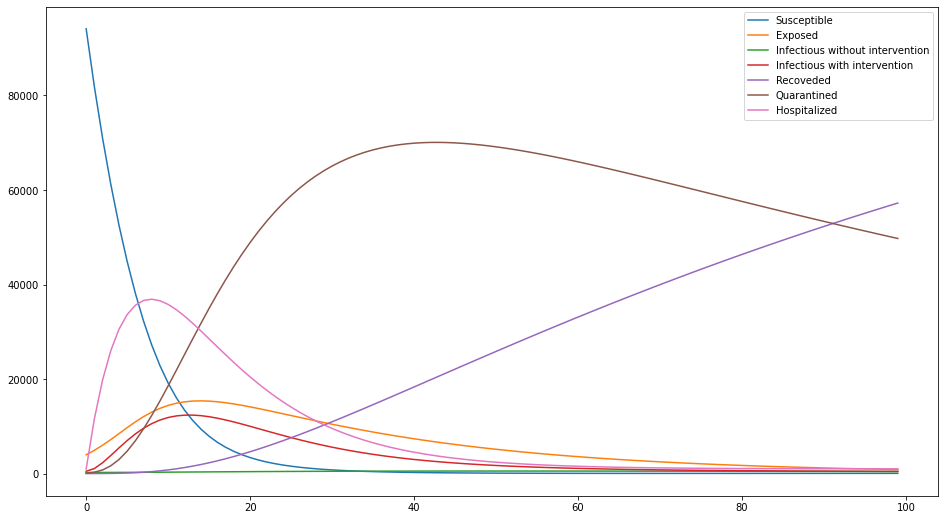

In [ ]:
plt.figure(figsize=(16,9))
for i in range(yt.y.shape[0]):
  plt.plot(yt.t,yt.y[i],label=var_names[i])
plt.legend()
plt.show()

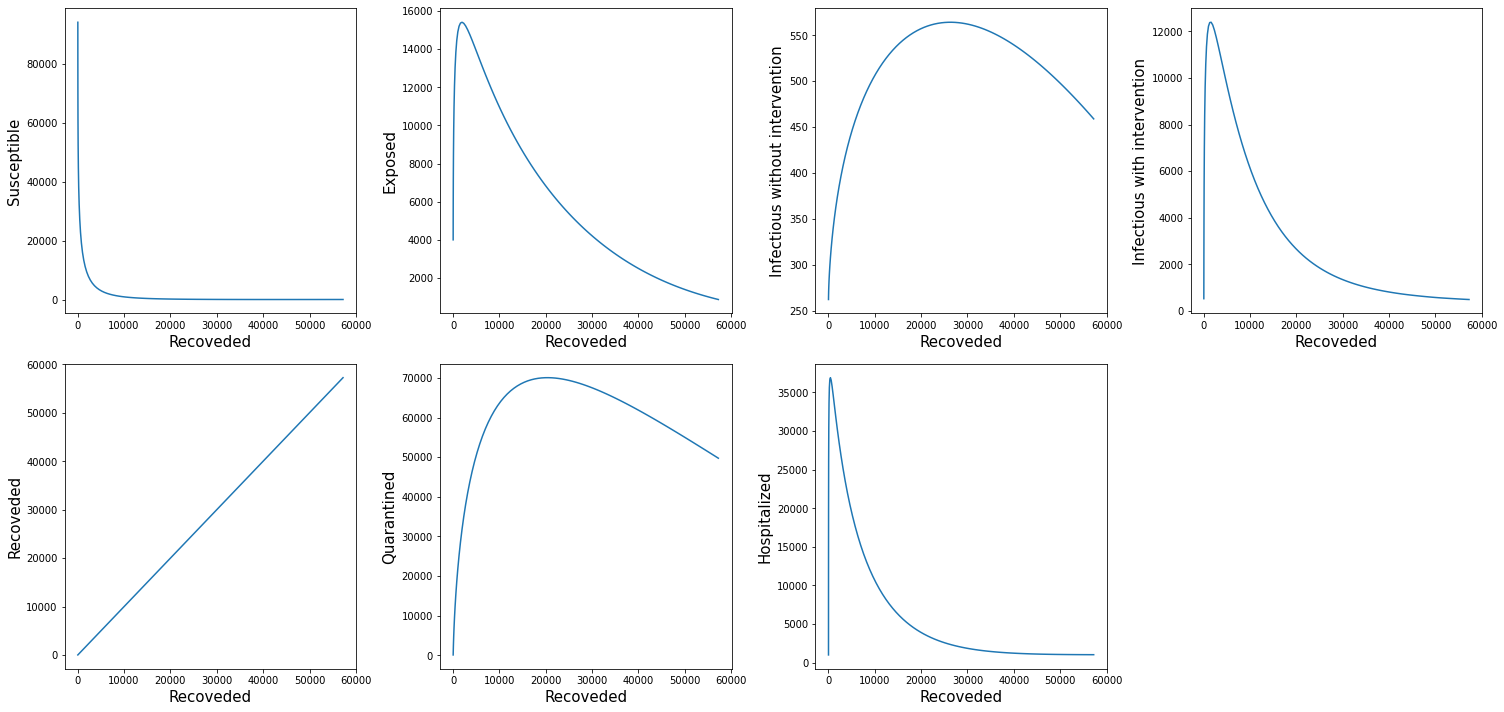

In [ ]:
plt.figure(figsize=(21,10))
var_ = 4
for i,y in enumerate(yt.y):
  plt.subplot(2,int(yt.y.shape[0]/2)+1,i+1)
  plt.plot(yt.y[var_],y)
  plt.xlabel(var_names[var_],fontsize=15)
  plt.ylabel(var_names[i],fontsize=15)
plt.tight_layout()
plt.show()